In [1]:
#dependencies
import pandas as pd
import numpy as np

#installations
# !pip install -U textblob 
# !python -m textblob.download_corpora

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#NLP imports
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# climate change tweet polarity

In [2]:
#import tweets csv
tweets_df = pd.read_csv ('climate_change_tweets.csv')
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [3]:
#remove unnecessary columns
clean_df = tweets_df[['date', 'username', 'tweet', 'language', 'retweets_count', 'likes_count']]
clean_df

,date,username,tweet,language,retweets_count,likes_count
0,2020-10-20,senkamalaharris,Voting rights Workers’ rights Consumer rights ...,en,1603,7887
1,2020-10-20,senkamalaharris,Climate change has primed California for longe...,en,1133,7368
2,2020-10-20,watrdi,🚨🚨🚨🚨Rule Changes for Rep🚨🚨🚨🚨 Foreign Policy ...,en,204,95
3,2020-10-20,rbreich,Your reminder that Amy Coney Barrett thinks cl...,en,642,1814
4,2020-10-20,prageru,Endangered eagles are being killed at enormous...,en,318,631
...,...,...,...,...,...,...
34370,2014-01-05,dantgilbert,Conservatives deny science on climate change &...,en,272,138
34371,2014-01-04,sarcasticrover,Reminder; Just because it might be cold where ...,en,383,194
34372,2014-01-03,lolgop,Reminder: One snow storm disproves climate cha...,en,272,144
34373,2014-01-03,james_bg,Won't convince those who don't want to be conv...,en,208,50


In [4]:
#import textblob, output sentiment; polarity range of -1 (negative) to 1 (positive)
from textblob import TextBlob, Word, Blobber

clean_df['tweet'][:5].apply(lambda x: TextBlob(x).sentiment[0])

0    0.000000
1   -0.166667
2   -0.041667
3    0.100000
4   -0.042857
Name: tweet, dtype: float64

In [5]:
#add sentiment output to df
clean_df['sentiment'] = clean_df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
clean_df

#honestly, results are interesting but not telling of the users' opinion on climate change; rather indicates users' tone instead

,date,username,tweet,language,retweets_count,likes_count,sentiment
0,2020-10-20,senkamalaharris,Voting rights Workers’ rights Consumer rights ...,en,1603,7887,0.000000
1,2020-10-20,senkamalaharris,Climate change has primed California for longe...,en,1133,7368,-0.166667
2,2020-10-20,watrdi,🚨🚨🚨🚨Rule Changes for Rep🚨🚨🚨🚨 Foreign Policy ...,en,204,95,-0.041667
3,2020-10-20,rbreich,Your reminder that Amy Coney Barrett thinks cl...,en,642,1814,0.100000
4,2020-10-20,prageru,Endangered eagles are being killed at enormous...,en,318,631,-0.042857
...,...,...,...,...,...,...,...
34370,2014-01-05,dantgilbert,Conservatives deny science on climate change &...,en,272,138,0.000000
34371,2014-01-04,sarcasticrover,Reminder; Just because it might be cold where ...,en,383,194,-0.319034
34372,2014-01-03,lolgop,Reminder: One snow storm disproves climate cha...,en,272,144,0.000000
34373,2014-01-03,james_bg,Won't convince those who don't want to be conv...,en,208,50,0.300000


# #climatechangeisahoax vs. #climatechangeisreal

In [23]:
#import csvs, clean columns
hoax_df = pd.read_csv ('cc_hoax_tweets.csv')
real_df = pd.read_csv ('cc_real_tweets.csv')

clean_hoax_df = hoax_df[['date', 'username', 'tweet', 'language', 'retweets_count', 'likes_count']]
clean_real_df = real_df[['date', 'username', 'tweet', 'language', 'retweets_count', 'likes_count']]

clean_hoax_df

,date,username,tweet,language,retweets_count,likes_count
0,2020-10-17,davidlimbaugh,President Trump has got to be prepared to knoc...,en,387,1383
1,2020-10-07,iminhisbook,Earth to AOC. Trump is doing well. Helping bus...,en,251,293
2,2020-09-29,eagleedmartin,"The ""science of Climate Change"" #ClimateChang...",en,209,379
3,2020-09-19,kagdiva_,🏛Replace Ginsberg IMMEDIATELY 👇Some things ha...,en,262,244
4,2020-09-15,vanessacvenus,🧐🧐🧐🧐 Wonder how that happens (sarcasm 😉) 🤨😒 #C...,en,268,191
...,...,...,...,...,...,...
186,2015-11-30,lindasuhler,Can't make up the crap these idiots think is '...,en,146,121
187,2015-11-20,lindasuhler,The bizarre belief system of the Democrat lead...,en,152,123
188,2015-05-28,lindasuhler,Obama's Screwed Up Priorities! #JunkScience #...,en,239,110
189,2015-02-13,davidpakmanshow,Fox host had to 'give up her freedom' during a...,en,273,10


## ngrams detection

In [19]:
#TF-IDF vectorizer imports
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

#find ngrams
vect = TfidfVectorizer(ngram_range=(2,5), stop_words='english')

#combine tweets into one string
summaries = "".join(clean_hoax_df['tweet'])

#output ngrams summaries w/ counter to find most common words/phrases in each hashtag
ngrams_summaries = vect.build_analyzer()(summaries)
hoax_ngrams = Counter(ngrams_summaries).most_common(20)

hoax_ngrams

[('climate change', 105),
 ('change hoax', 102),
 ('climate change hoax', 90),
 ('climatechangehoax https', 19),
 ('human activity', 18),
 ('global temperatures', 16),
 ('hoax collapses', 15),
 ('collapses new', 15),
 ('new science', 15),
 ('science finds', 15),
 ('finds human', 15),
 ('activity virtually', 15),
 ('virtually zero', 15),
 ('zero impact', 15),
 ('impact global', 15),
 ('change hoax collapses', 15),
 ('hoax collapses new', 15),
 ('collapses new science', 15),
 ('new science finds', 15),
 ('science finds human', 15)]

In [20]:
#repeat for other hashtag
summaries = "".join(clean_real_df['tweet'])

ngrams_summaries = vect.build_analyzer()(summaries)
real_ngrams = Counter(ngrams_summaries).most_common(20)

real_ngrams

[('climatechangeisreal https', 128),
 ('climate change', 41),
 ('climatechangeisreal http', 15),
 ('climatechange climatechangeisreal', 11),
 ('climatechangeisreal amp', 9),
 ('climatechangeisreal climateaction', 7),
 ('don want', 7),
 ('climatechangeisreal climatechange', 7),
 ('global warming', 7),
 ('parisagreement climatechangeisreal', 7),
 ('retweet agree', 7),
 ('climate emergency', 6),
 ('onevoice1 https', 6),
 ('climatechangeisreal globalwarming', 6),
 ('don believe', 6),
 ('climatechangeisreal resist', 6),
 ('climatechangeisreal retweet', 6),
 ('agree neiltyson', 6),
 ('neiltyson https', 6),
 ('climatechange climatechangeisreal https', 6)]

## deep learning to output new tweets
https://medium.com/@nikkisharma536/what-will-elon-musk-tweet-next-generating-tweets-with-deep-learning-acddfbf42ed6

In [21]:
# !pip install torch===1.6.0 torchvision===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install fastai==1.0.61

#import fastAI; may need to use above pip installs (**very** time consuming)
from fastai.text import *

#create 'databunch' for fastAI to tokenize
hoax_data = (text.data.TextList.from_df(clean_hoax_df, cols='tweet')\
        .random_split_by_pct(0.1)\
        .label_for_lm()\
        .databunch(bs=48))

hoax_data.show_batch()

idx,text
0,". xxmaj trump is doing xxunk . xxmaj xxunk xxunk & & xxunk xxunk by the xxup xxunk xxunk is xxunk . xxmaj but xxunk money to fund a climate change hoax has zero to do with the xxunk crisis . xxmaj so off to your xxunk xxunk & & let xxup xxunk do the xxunk xxunk https : / / t.co / xxunk xxbos xxmaj the "" science of"
1,"is a xxunk xxunk to pay , these xxunk left climate change brainwashed xxunk xxunk for this xxunk xxunk . # xxunk # xxunk https : / / t.co / xxunk xxbos xxmaj the xxunk xxunk # xxunk and his xxunk xxunk are xxunk about # xxunk # climatechangehoax # xxunk # xxunk # xxmaj xxunk xxmaj this is their xxunk xxunk xxrep 4 . xxbos xxmaj xxunk - xxunk"
2,— hoax xxmaj xxunk / xxunk xxmaj xxunk — hoax xxmaj russian xxmaj xxunk / collusion — hoax xxmaj xxunk xxmaj xxunk — hoax xxmaj xxunk xxmaj xxunk xxunk xxunk — hoax xxmaj xxunk — hoax xxup xxunk — xxmaj xxunk hoax xxmaj xxunk ’s xxunk ’s on xxup us xxunk — hoax xxmaj trump ’s xxunk “ hoax ” xxunk xxunk xxunk xxmaj who ’s the real hoax ?
3,climatechangehoax xxbos * xxmaj xxunk xxmaj xxunk . xxmaj hoax ! * xxmaj xxunk xxunk . xxmaj hoax ! * xxunk xxunk xxunk xxunk of xxunk xxunk . xxmaj hoax ! * xxmaj friends with xxmaj xxunk xxmaj xxunk . xxmaj hoax ! * xxmaj climate xxmaj change . xxmaj hoax ! * xxmaj xxunk xxmaj xxunk xxunk . xxmaj hoax ! * xxmaj xxunk xxunk . xxmaj hoax !
4,"will be xxunk it , if only to xxunk xxunk the xxunk of the xxunk / climate change hoax and the xxunk up of xxunk good xxunk xxunk power xxunk . https : / / t.co / xxunk xxbos xxmaj xxunk ... if you were xxunk about the xxmaj climate change hoax xxunk ... this might xxunk you a more xxunk xxunk of what 's going on . xxmaj it"


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


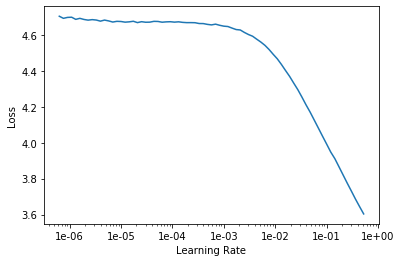

In [22]:
#create a deep learning model w/ fastAI
learn = language_model_learner (hoax_data, AWD_LSTM, drop_mult=0.3, model_dir = '/tweetmodels')

#find the appropriate learning rate
learn.lr_find()

#find the point where the slope is steepest
learn.recorder.plot (skip_end=15)

In [24]:
#fit the model based on selected learning rate
learn.fit_one_cycle (1, 1e-1, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.471942,3.462579,0.338690,00:14


In [25]:
#begin predicting tweets starting from some n_words found before
N_WORDS = 25

print (learn.predict ("Hoax", N_WORDS, temperature = 0.75))
print (learn.predict ("Science", N_WORDS, temperature = 0.75))
print (learn.predict ("Trump is", N_WORDS, temperature = 0.75))
print (learn.predict ("Zero impact", N_WORDS, temperature = 0.75))

Hoax COLLAPSES as new science finds human activity has virtually zero impact on human activity . Scientists do so to encourage human activity as
Science science finds human activity has virtually zero impact on global temperatures as new science finds human activity has virtually zero impact on global temperatures temperatures
Trump is Trump 's power man who would actually control human activity but when he finds his plan for the real real hoax he finds his
Zero impact on impact on human activity on global temperatures has impact on human activity , as new science finds human activity has zero impact on global


In [26]:
#repeat process for 'climatechangeisreal' tag
real_data = (text.data.TextList.from_df(clean_real_df, cols='tweet')\
        .random_split_by_pct(0.1)\
        .label_for_lm()\
        .databunch(bs=48))

real_data.show_batch()

idx,text
0,to the climate crisis next year . # xxunk https : / / t.co / xxunk xxbos i took a xxunk in the xxunk and came out xxunk than the xxunk . xxunk xxmaj xxunk xxmaj david xxmaj xxunk https : / / t.co / xxunk # xxmaj xxunk # xxunk # xxup xxunk # xxmaj xxunk # xxmaj xxunk # xxmaj nature # xxunk # climatechangeisreal xxbos xxmaj week
1,", this is the xxmaj xxunk . xxmaj climate xxmaj change has xxunk us our xxunk system . xxmaj climate xxmaj emergency should be xxunk now ! # climatechangeisreal https : / / t.co / xxunk xxbos xxmaj week xxunk ! # xxunk from xxmaj xxunk . let 's stop xxunk and xxunk is better than words . xxmaj we can not xxunk xxunk ! xxmaj we want a world"
2,xxunk 2020 xxunk the xxunk - old “ has xxunk xxunk to make politicians xxunk their eyes to the climate crisis . ” ( xxunk for xxmaj republicans ) xxmaj xxunk xxunk # onevoice1 # climatechangeisreal https : / / t.co / xxunk xxbos xxmaj the xxunk of # xxunk xxunk is xxunk news . xxmaj clear weather flooding has xxunk a xxunk xxunk in xxunk xxmaj florida . xxmaj
3,"t.co / xxunk xxbos # climatechange is a xxunk xxunk by xxmaj china 2 xxunk us , xxmaj xxunk 45 . xxmaj no , his xxunk & & xxunk xxunk has xxunk 🇺 xxunk xxunk xxunk xxunk . # climatechangeisreal . “ xxmaj we ’re the xxunk xxunk 2 feel xxunk of climate change , & & the last that can do xxunk about it . ” xxunk xxmaj obama"
4,"xxunk . xxmaj over a billion animals have xxunk . xxmaj it 's heartbreaking . xxunk xxmaj we must do more for our planet and all of its xxunk . # climatechangeisreal & & we need # climateactionnow ! https : / / t.co / xxunk xxbos xxmaj xxunk in xxmaj xxunk xxunk "" xxunk got to go "" xxunk # auspol # xxunk # xxunk # xxunk # xxunk"


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


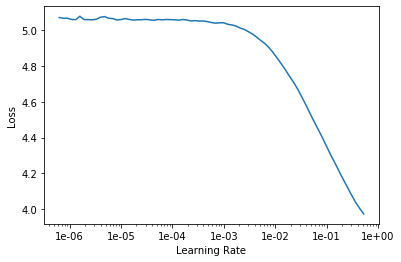

In [27]:
#create a deep learning model w/ fastAI
learn2 = language_model_learner (real_data, AWD_LSTM, drop_mult=0.3, model_dir = '/tweetmodels')

#find the appropriate learning rate
learn2.lr_find()

#find the point where the slope is steepest
learn2.recorder.plot (skip_end=15)

In [28]:
#fit the model based on selected learning rate
learn2.fit_one_cycle (1, 1e-1, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.369859,3.015559,0.385417,00:21


In [34]:
#begin predicting tweets starting from some n_words found before

print (learn2.predict ("Climate change", N_WORDS, temperature = 0.75))
print (learn2.predict ("Neil", N_WORDS, temperature = 0.75))
print (learn2.predict ("Trump is", N_WORDS, temperature = 0.75))
print (learn2.predict ("Sea ice", N_WORDS, temperature = 0.75))

Climate change may be a massive matter in the history of the world . As the climate crisis is coming , major Paris leaders such
Neil Day in France for the Year 2015 UN Report on Air Day Action In the year
Trump is a leader in the world beyond the Arctic . He does not agree with the Arctic who does not support scientific action
Sea ice is being warmer than it are in France . This is due to rain forest . Because of the rain levels that
